 SMART CITY ANALYTICS PROJECT
Traffic data loaded successfully
Shape: (1830, 5)
Energy data loaded successfully
Shape: (60, 5)

=== TRAFFIC ANALYSIS ===

 Average Congestion Levels:
Mumbai: 10.24 (High)
Bangalore: 8.08 (High)
Delhi: 7.95 (High)
Jammu: 6.82 (Medium)
Srinagar: 5.70 (Medium)

 Average Speed Rankings:
Srinagar: 18.6 km/h
Jammu: 16.4 km/h
Delhi: 14.1 km/h
Bangalore: 13.8 km/h
Mumbai: 9.5 km/h

 Worst traffic month: 1 (7.91)
 Best traffic month: 6 (7.58)

=== ENERGY ANALYSIS ===

 Total Energy Consumption (MW):
Delhi: 66,241 MW
Mumbai: 43,932 MW
Bangalore: 31,228 MW
Jammu: 19,011 MW
Srinagar: 12,600 MW

 Renewable Energy Usage (%):
Mumbai: 24.3%
Bangalore: 23.8%
Srinagar: 22.9%
Delhi: 22.7%
Jammu: 22.5%

 Highest Peak Demand (MW):
Delhi: 9,020 MW
Mumbai: 5,936 MW
Bangalore: 3,933 MW
Jammu: 2,485 MW
Srinagar: 1,556 MW


C:\Users\saksh\AppData\Local\Temp\ipykernel_14036\3998617475.py:67: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.energy_data['month'] = pd.to_datetime(self.energy_data['month'])


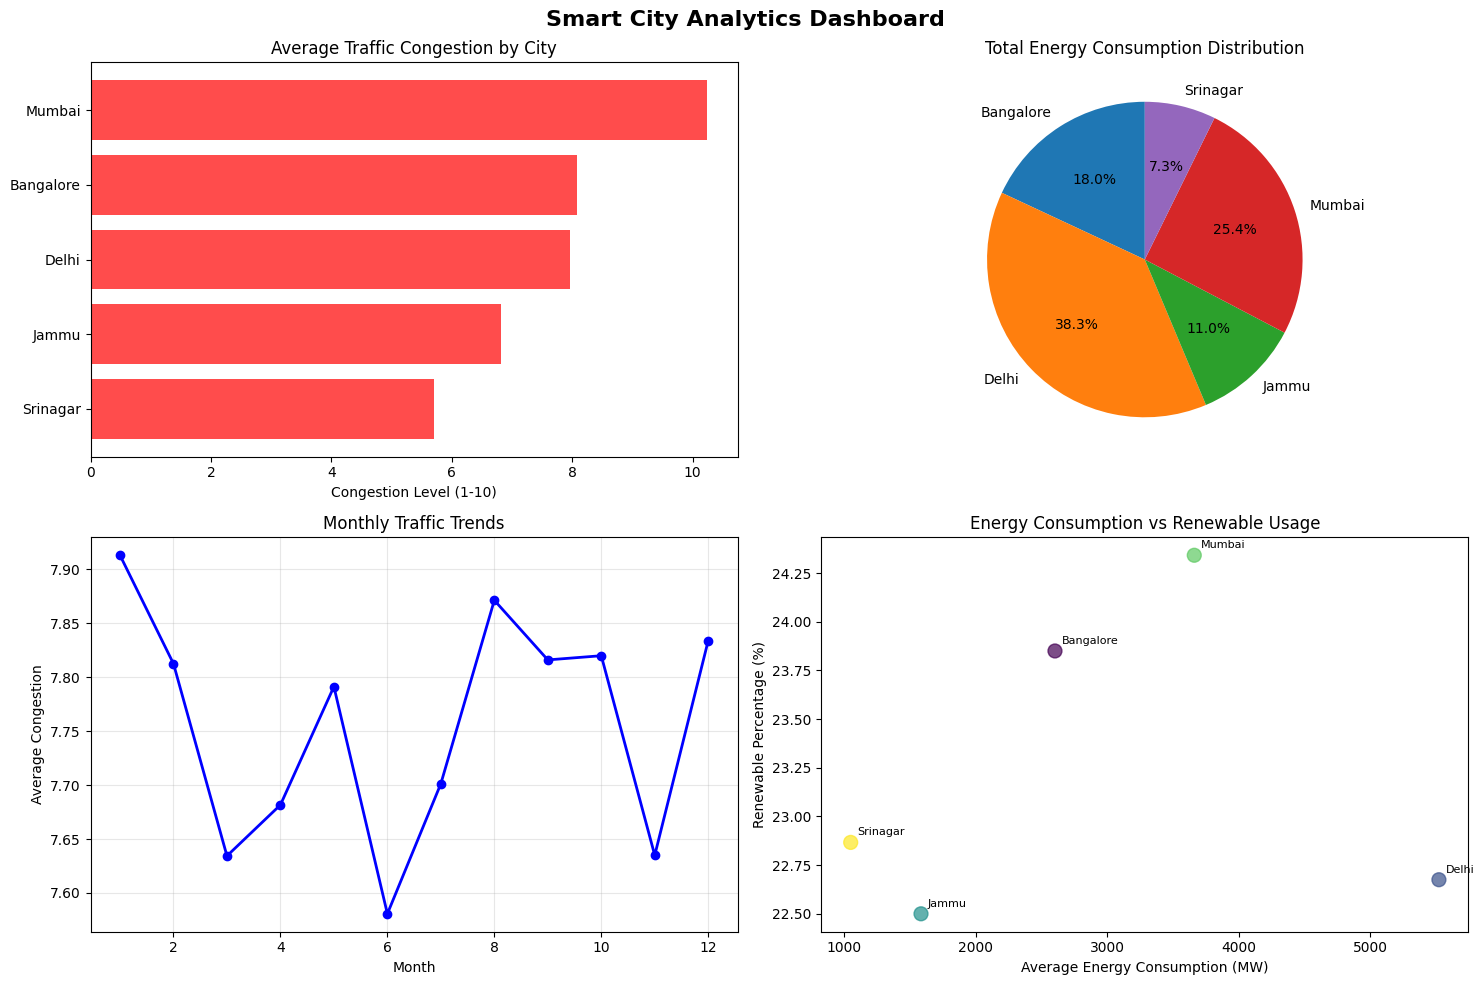


KEY INSIGHTS & RECOMMENDATIONS

 TRAFFIC INSIGHTS:
• Most congested city: Mumbai (10.24/10)
• Least congested city: Srinagar (5.70/10)
• Recommendation: Implement smart traffic signals in Mumbai

 ENERGY INSIGHTS:
• Highest energy consumer: Delhi (66,241 MW)
• Lowest renewable usage: Jammu (22.5%)
• Recommendation: Increase solar/wind capacity in Jammu

 SMART CITY RECOMMENDATIONS:
1. Deploy AI traffic management in Mumbai
2. Expand renewable energy in Jammu
3. Implement integrated city dashboard for real-time monitoring
4. Focus on public transportation to reduce congestion

 Analysis completed successfully!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class SmartCityAnalyzer:
    def __init__(self):
        self.traffic_data = None
        self.energy_data = None
        
    def load_data(self):
        try:
            self.traffic_data = pd.read_csv('traffic.csv')
            print("Traffic data loaded successfully")
            print(f"Shape: {self.traffic_data.shape}")
            
        except FileNotFoundError:
            print("traffic.csv not found. Creating sample data...")
            
        try:
            self.energy_data = pd.read_csv('energy.csv')
            print("Energy data loaded successfully")
            print(f"Shape: {self.energy_data.shape}")
            
        except FileNotFoundError:
            print("energy.csv not found. Creating sample data...")
    

    def analyze_traffic(self):
        print("\n=== TRAFFIC ANALYSIS ===")
        
        # Convert date column if needed
        if 'date' in self.traffic_data.columns:
            self.traffic_data['date'] = pd.to_datetime(self.traffic_data['date'])
        
        # 1. Average congestion by city
        avg_congestion = self.traffic_data.groupby('city')['congestion_level'].mean().sort_values(ascending=False)
        print("\n Average Congestion Levels:")
        for city, congestion in avg_congestion.items():
            status = "High" if congestion > 7 else "Medium" if congestion > 5 else "Low"
            print(f"{city}: {congestion:.2f} ({status})")
        
        # 2. Speed analysis
        if 'avg_speed_kmh' in self.traffic_data.columns:
            avg_speed = self.traffic_data.groupby('city')['avg_speed_kmh'].mean().sort_values(ascending=False)
            print(f"\n Average Speed Rankings:")
            for city, speed in avg_speed.items():
                print(f"{city}: {speed:.1f} km/h")
        
        # 3. Monthly trends
        if 'date' in self.traffic_data.columns:
            self.traffic_data['month'] = self.traffic_data['date'].dt.month
            monthly_congestion = self.traffic_data.groupby('month')['congestion_level'].mean()
            worst_month = monthly_congestion.idxmax()
            best_month = monthly_congestion.idxmin()
            print(f"\n Worst traffic month: {worst_month} ({monthly_congestion[worst_month]:.2f})")
            print(f" Best traffic month: {best_month} ({monthly_congestion[best_month]:.2f})")
        
        return avg_congestion
    
    def analyze_energy(self):
        """Basic energy analysis and insights"""
        print("\n=== ENERGY ANALYSIS ===")
        
        # Convert month column if needed
        if 'month' in self.energy_data.columns:
            self.energy_data['month'] = pd.to_datetime(self.energy_data['month'])
        
        # 1. Total consumption by city
        total_consumption = self.energy_data.groupby('city')['energy_consumption_mw'].sum().sort_values(ascending=False)
        print("\n Total Energy Consumption (MW):")
        for city, consumption in total_consumption.items():
            print(f"{city}: {consumption:,.0f} MW")
        
        # 2. Renewable energy adoption
        if 'renewable_percentage' in self.energy_data.columns:
            avg_renewable = self.energy_data.groupby('city')['renewable_percentage'].mean().sort_values(ascending=False)
            print(f"\n Renewable Energy Usage (%):")
            for city, renewable in avg_renewable.items():
                print(f"{city}: {renewable:.1f}%")
        
        # 3. Peak demand analysis
        if 'peak_demand_mw' in self.energy_data.columns:
            max_peak = self.energy_data.groupby('city')['peak_demand_mw'].max().sort_values(ascending=False)
            print(f"\n Highest Peak Demand (MW):")
            for city, peak in max_peak.items():
                print(f"{city}: {peak:,.0f} MW")
        
        return total_consumption
    
    def create_visualizations(self):
       
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('Smart City Analytics Dashboard', fontsize=16, fontweight='bold')
        
        # 1. Traffic Congestion by City
        traffic_avg = self.traffic_data.groupby('city')['congestion_level'].mean().sort_values()
        ax1.barh(traffic_avg.index, traffic_avg.values, color='red', alpha=0.7)
        ax1.set_title('Average Traffic Congestion by City')
        ax1.set_xlabel('Congestion Level (1-10)')
        
        # 2. Energy Consumption by City
        energy_total = self.energy_data.groupby('city')['energy_consumption_mw'].sum()
        ax2.pie(energy_total.values, labels=energy_total.index, autopct='%1.1f%%', startangle=90)
        ax2.set_title('Total Energy Consumption Distribution')
        
        # 3. Monthly Traffic Trends
        if 'date' in self.traffic_data.columns:
            monthly_traffic = self.traffic_data.groupby(self.traffic_data['date'].dt.month)['congestion_level'].mean()
            ax3.plot(monthly_traffic.index, monthly_traffic.values, marker='o', linewidth=2, color='blue')
            ax3.set_title('Monthly Traffic Trends')
            ax3.set_xlabel('Month')
            ax3.set_ylabel('Average Congestion')
            ax3.grid(True, alpha=0.3)
        
        # 4. Renewable Energy vs Total Consumption
        if 'renewable_percentage' in self.energy_data.columns:
            city_energy = self.energy_data.groupby('city').agg({
                'energy_consumption_mw': 'mean',
                'renewable_percentage': 'mean'
            })
            scatter = ax4.scatter(city_energy['energy_consumption_mw'], 
                                city_energy['renewable_percentage'],
                                s=100, alpha=0.7, c=range(len(city_energy)), cmap='viridis')
            ax4.set_title('Energy Consumption vs Renewable Usage')
            ax4.set_xlabel('Average Energy Consumption (MW)')
            ax4.set_ylabel('Renewable Percentage (%)')
            
            # Add city labels
            for i, city in enumerate(city_energy.index):
                ax4.annotate(city, (city_energy.iloc[i]['energy_consumption_mw'], 
                                  city_energy.iloc[i]['renewable_percentage']),
                           xytext=(5, 5), textcoords='offset points', fontsize=8)
        
        plt.tight_layout()
        plt.show()
    
    def generate_insights(self):
        """Generate key insights and recommendations"""
        print("\n" + "="*50)
        print("KEY INSIGHTS & RECOMMENDATIONS")
        print("="*50)
        
        # Traffic insights
        traffic_avg = self.traffic_data.groupby('city')['congestion_level'].mean()
        most_congested = traffic_avg.idxmax()
        least_congested = traffic_avg.idxmin()
        
        print(f"\n TRAFFIC INSIGHTS:")
        print(f"• Most congested city: {most_congested} ({traffic_avg[most_congested]:.2f}/10)")
        print(f"• Least congested city: {least_congested} ({traffic_avg[least_congested]:.2f}/10)")
        print(f"• Recommendation: Implement smart traffic signals in {most_congested}")
        
        # Energy insights
        energy_total = self.energy_data.groupby('city')['energy_consumption_mw'].sum()
        highest_consumer = energy_total.idxmax()
        
        if 'renewable_percentage' in self.energy_data.columns:
            renewable_avg = self.energy_data.groupby('city')['renewable_percentage'].mean()
            lowest_renewable = renewable_avg.idxmin()
            
            print(f"\n ENERGY INSIGHTS:")
            print(f"• Highest energy consumer: {highest_consumer} ({energy_total[highest_consumer]:,.0f} MW)")
            print(f"• Lowest renewable usage: {lowest_renewable} ({renewable_avg[lowest_renewable]:.1f}%)")
            print(f"• Recommendation: Increase solar/wind capacity in {lowest_renewable}")
        
        # Overall recommendations
        print(f"\n SMART CITY RECOMMENDATIONS:")
        print(f"1. Deploy AI traffic management in {most_congested}")
        print(f"2. Expand renewable energy in {lowest_renewable}")
        print(f"3. Implement integrated city dashboard for real-time monitoring")
        print(f"4. Focus on public transportation to reduce congestion")
    
    def run_analysis(self):
        """Run complete analysis"""
        print(" SMART CITY ANALYTICS PROJECT")
        print("="*40)
        
        # Load data
        self.load_data()
        
        # Run analyses
        traffic_results = self.analyze_traffic()
        energy_results = self.analyze_energy()
        
        # Create visualizations
        self.create_visualizations()
        
        # Generate insights
        self.generate_insights()
        
        print(f"\n Analysis completed successfully!")
        return traffic_results, energy_results

# Run the analysis
if __name__ == "__main__":
    analyzer = SmartCityAnalyzer()
    traffic_results, energy_results = analyzer.run_analysis()